In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("C:\\PROJECTS\\ML PROJECTS\\Linear Regression Project\\car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
print(df['Fuel_Type'].value_counts())
print(df['Selling_Price'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64


In [9]:
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
fuel_ty=df['Fuel_Type']
seller_ty=df['Seller_Type']
transmission_ty=df['Transmission']
selling_pri=df['Selling_Price']

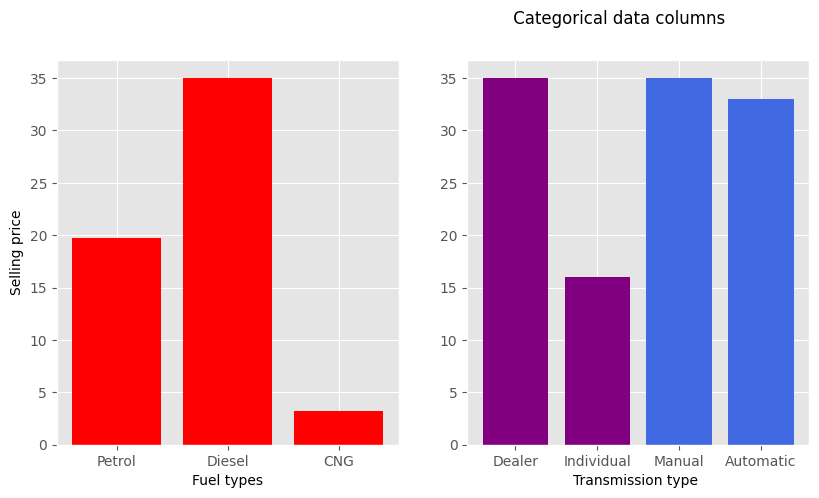

In [11]:
#Using ggplot from r language for histogram 
from matplotlib import style 
style.use('ggplot')
fig=plt.figure(figsize=(15,5))
fig.suptitle(" Categorical data columns ")
plt.subplot(1,3,1)
plt.bar(fuel_ty,selling_pri,color='red')
plt.xlabel('Fuel types')
plt.ylabel('Selling price')
plt.subplot(1,3,2)
plt.bar(seller_ty,selling_pri,color='purple')
plt.xlabel('Seller Types')
plt.bar(transmission_ty,selling_pri,color='royalblue')
plt.xlabel('Transmission type ')
plt.show()


<Axes: >

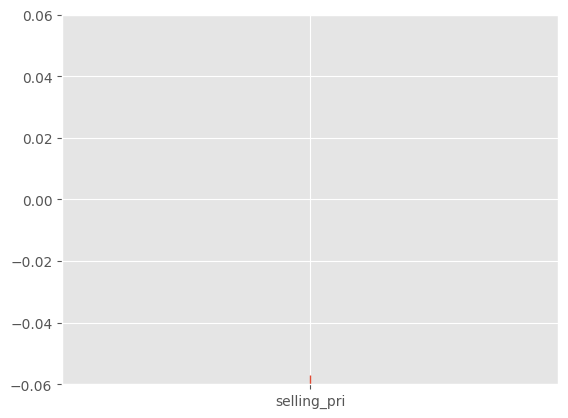

In [12]:
sns.rugplot('selling_pri')

In [13]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df=pd.get_dummies(df,columns=['Seller_Type','Transmission'],drop_first=True)

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


In [15]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']



In [16]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Owner  \
0    2014           5.59       27000          0      0   
1    2013           9.54       43000          1      0   
2    2017           9.85        6900          0      0   
3    2011           4.15        5200          0      0   
4    2014           6.87       42450          1      0   
..    ...            ...         ...        ...    ...   
296  2016          11.60       33988          1      0   
297  2015           5.90       60000          0      0   
298  2009          11.00       87934          0      0   
299  2017          12.50        9000          1      0   
300  2016           5.90        5464          0      0   

     Seller_Type_Individual  Transmission_Manual  
0                         0                    1  
1                         0                    1  
2                         0                    1  
3                         0                    1  
4                         0                    1

In [17]:
print(x.shape)
y.shape

(301, 7)


(301,)

In [18]:
#Regression starts works here
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(240, 7)
(61, 7)
(240,)
(61,)


In [21]:
#standardize the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


[-2.38905928  4.94608627  1.80334729 -1.04173958  2.98148597  3.64457757
  4.24732942  3.81354593  1.06386636  7.50084307  0.94470409  6.67876642
  8.79783784  5.17766362  2.27968762  7.22214532  9.78307497 -0.11014956
  6.68328264  1.93181054  1.96802086  9.14451819  4.27173093  0.97901523
  6.36457021  8.96753189  3.36002436  4.70558375  1.50247829  1.71682411
  7.29265409 10.55505525  4.88097718  6.07405609  8.48798576  3.54185972
  3.5015096  11.08326815  2.56987524  7.42671354  6.68266124  5.11130044
  6.28040232  4.77091304  4.2143351   1.01557724  2.00884624  3.97903994
  0.74563481  4.32761226 21.18280998  1.38238765  4.39177068  7.11459306
  6.7636377   2.873515    7.30681442  2.21273607  2.81958355  3.16504948
 -2.89393189]
--------------------------------------------
Coeff are : [ 1.16810421  3.7812471  -0.18392575  0.73441312  0.10723128 -0.58351662
 -0.5521041 ]
--------------------------------------------
Intercept  : 4.690291666666661
------------------------------------

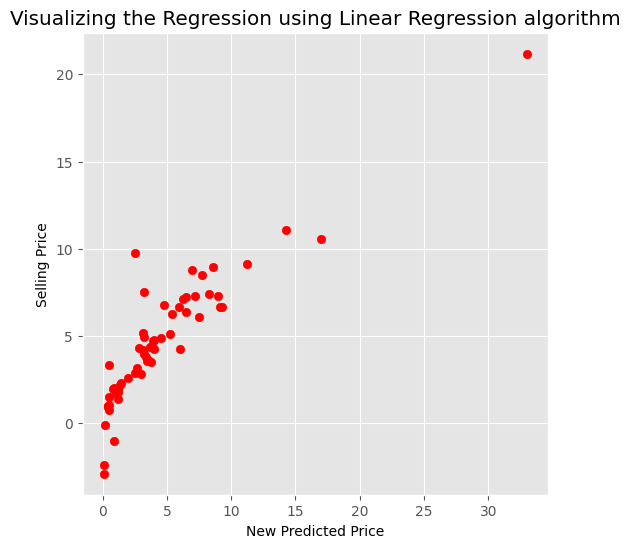

In [22]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
print(Y_pred)

train_accuracy_lr = lr.score(X_train, Y_train)
test_accuracy_lr = lr.score(X_test, Y_test)
r2_score_lr = r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",lr.coef_)
print("--------------------------------------------")
print("Intercept  :",lr.intercept_)
print("--------------------------------------------")
print('train_accuracy_lr:', train_accuracy_lr)
print("--------------------------------------------")
print('test_accuracy_lr:', test_accuracy_lr)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_lr)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Linear Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()



[-2.38704831  4.94784891  1.80291632 -1.04052987  2.98247899  3.64535847
  4.24528578  3.81384988  1.06384753  7.50406874  0.94470014  6.67992856
  8.79513312  5.17978009  2.27898886  7.22304135  9.77779049 -0.10995756
  6.6821106   1.9313066   1.96751828  9.14401996  4.27200635  0.97908809
  6.36358121  8.96718114  3.36099756  4.7055922   1.50218201  1.71646172
  7.29343244 10.5513813   4.88085285  6.07320514  8.4880298   3.54255766
  3.50226937 11.0792232   2.57128868  7.42736331  6.68148904  5.1109447
  6.28178969  4.7708626   4.21476179  1.01565567  2.00832386  3.97945012
  0.74587131  4.32802979 21.17711795  1.38221254  4.39197511  7.11299948
  6.76476864  2.87466903  7.30524663  2.21206931  2.82071315  3.16597711
 -2.89176247]
--------------------------------------------
Coeff are : [ 1.16737923  3.77877887 -0.18397279  0.73498992  0.10707951 -0.58431074
 -0.55259656]
--------------------------------------------
Intercept  : 4.690291666666661
-------------------------------------

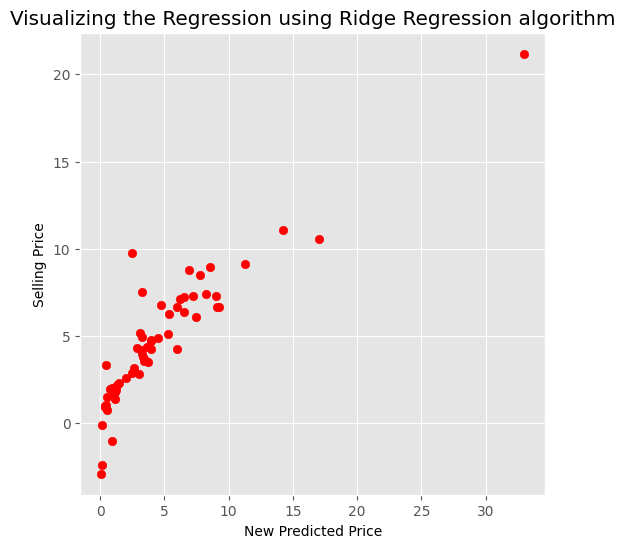

In [23]:
#Ridge Regression
from sklearn.linear_model import Ridge
rd=Ridge(0.1)
rd.fit(X_train,Y_train)
Y_pred=rd.predict(X_test)
print(Y_pred)

train_accuracy_rd = rd.score(X_train, Y_train)
test_accuracy_rd = rd.score(X_test, Y_test)
r2_score_rd = r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",rd.coef_)
print("--------------------------------------------")
print("Intercept  :",rd.intercept_)
print("--------------------------------------------")
print('train_accuracy_rd:', train_accuracy_rd)
print("--------------------------------------------")
print('test_accuracy_rd:', test_accuracy_rd)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_rd)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Ridge Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[-2.03354205  4.32351711  1.89947094 -0.75532651  3.12380176  3.63381762
  4.33451036  4.06239747  1.21615706  7.15460877  1.14013759  6.57623165
  8.83300565  5.10632402  2.33992481  7.04914702  8.24852973 -0.46143903
  6.61653597  2.01971415  2.03531636  9.0518607   4.3141261   1.10748841
  6.31686212  8.85461858  3.14123581  4.73403813  1.64219989  1.80541526
  7.17090186 10.44418307  4.92050406  6.07017203  8.31988848  3.63271181
  3.57231532 10.9898765   2.61656264  7.3280989   6.61629862  5.21083537
  6.00638087  4.80983066  4.17704445  1.12399587  2.07124588  4.07908502
  0.87168287  4.24241926 20.53442026  1.50127717  4.43192272  7.14963506
  6.64423695  2.95215038  7.2316834   2.28130622  2.94580183  3.28011397
 -2.41626192]
--------------------------------------------
Coeff are : [ 1.12439508  3.75484344 -0.07025375  0.65513636  0.         -0.51551499
 -0.44859874]
--------------------------------------------
Intercept  : 4.690291666666662
------------------------------------

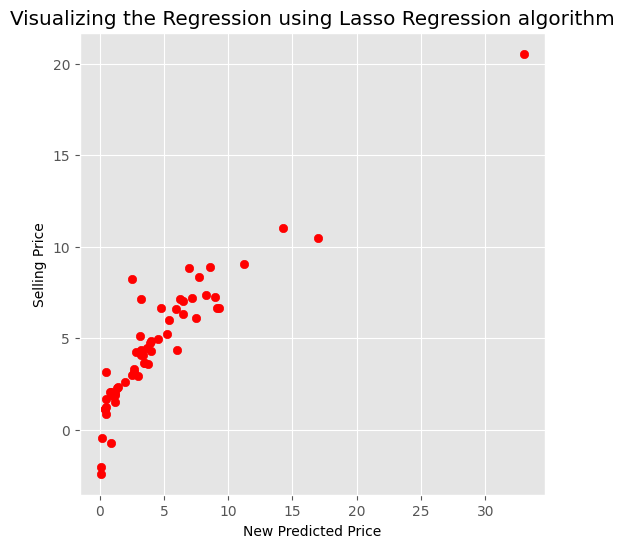

In [24]:
#Lasso 
from sklearn.linear_model import Lasso
ls=Lasso(0.1)
ls.fit(X_train,Y_train)
Y_pred=ls.predict(X_test)
print(Y_pred)

train_accuracy_ls = ls.score(X_train, Y_train)
test_accuracy_ls= ls.score(X_test, Y_test)
r2_score_ls = r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",ls.coef_)
print("--------------------------------------------")
print("Intercept  :",ls.intercept_)
print("--------------------------------------------")
print('train_accuracy_ls:', train_accuracy_ls)
print("--------------------------------------------")
print('test_accuracy_ls:', test_accuracy_ls)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_ls)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Lasso Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[-2.37094652  5.03082773  1.77765578 -1.0398459   2.99924092  3.65671305
  4.18330128  3.80642164  1.04661715  7.61165442  0.92791668  6.71741273
  8.722988    5.23824559  2.2492024   7.25793929  9.79252262 -0.09297587
  6.65439745  1.90427891  1.94245166  9.14564737  4.27529266  0.9640067
  6.34029779  8.97230332  3.43596147  4.70244644  1.48024301  1.69283011
  7.32364356 10.4635723   4.87454593  6.0493806   8.50447635  3.55213491
  3.51131609 10.98058147  2.59596182  7.45651084  6.65377287  5.09526993
  6.37631719  4.7663266   4.22348105  1.000666    1.9827723   3.97623025
  0.73273785  4.33840067 21.12219829  1.3591924   4.39158241  7.06947426
  6.80146917  2.89713098  7.26605303  2.18306794  2.83874517  3.17519886
 -2.87357682]
--------------------------------------------
Coeff are : [ 1.15563779  3.71952786 -0.18486342  0.75585756  0.11005372 -0.60976111
 -0.58748435]
--------------------------------------------
Intercept  : [4.69381621]
------------------------------------------

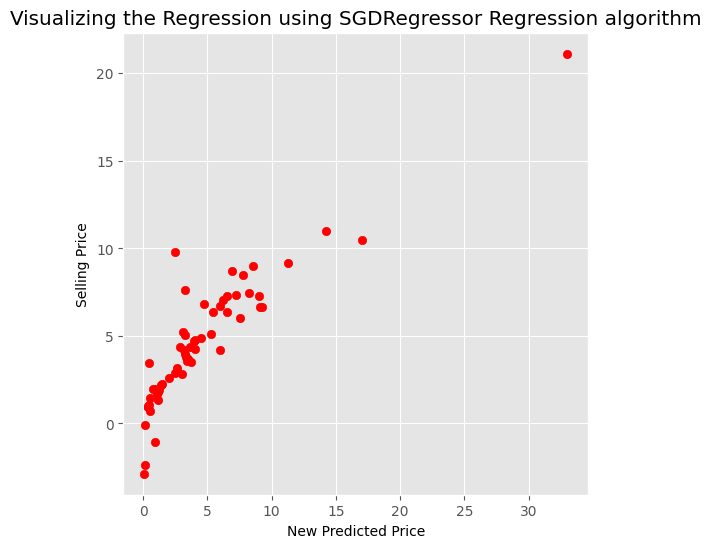

In [25]:
#SGD Regressor 
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(loss="squared_error")
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
print(Y_pred)

train_accuracy_sgd = sgd.score(X_train, Y_train)
test_accuracy_sgd= sgd.score(X_test, Y_test)
r2_score_sgd= r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",sgd.coef_)
print("--------------------------------------------")
print("Intercept  :",sgd.intercept_)
print("--------------------------------------------")
print('train_accuracy_sgd:', train_accuracy_sgd)
print("--------------------------------------------")
print('test_accuracy_sgd:', test_accuracy_sgd)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_sgd)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using SGDRegressor Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[ 0.21   2.155  1.135  1.08   2.845  4.79   5.145  3.085  0.59   3.27
  0.327  5.97   7.655  3.235  1.515  7.005 10.021  0.218  7.31   1.155
  0.762  9.485  4.615  0.448  7.63  10.215  0.448  4.595  0.6    0.933
  6.135 14.791  4.725  6.7    7.885  4.165  3.19  13.997  2.86   6.64
  7.31   5.43   5.14   4.69   2.985  0.448  0.723  3.655  0.62   2.345
 22.399  1.42   4.29   7.221  5.97   1.93   9.167  1.505  3.085  2.57
  0.2  ]
--------------------------------------------
train_accuracy_rf: 0.9793769529823096
--------------------------------------------
test_accuracy_rf: 0.8701862201953889
--------------------------------------------
 Acuracy of Our Model is : 0.8701862201953889
--------------------------------------------


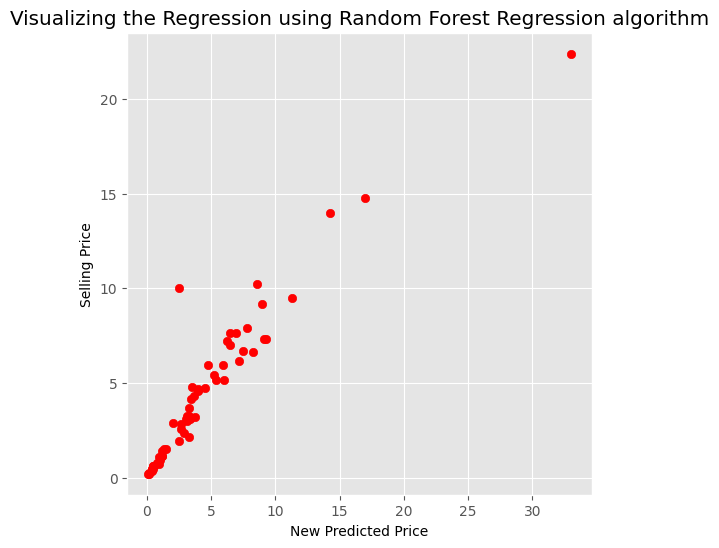

In [26]:
#Random froest Regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print(Y_pred)

train_accuracy_rf = rf.score(X_train, Y_train)
test_accuracy_rf= rf.score(X_test, Y_test)
r2_score_rf= r2_score(Y_test, Y_pred)
#Random forest does not have coeff anf intercepts
#print("Coeff are :",rf.coef_)
#print("Intercept  :",rf.intercept_)
print("--------------------------------------------")
print('train_accuracy_rf:', train_accuracy_rf)
print("--------------------------------------------")
print('test_accuracy_rf:', test_accuracy_rf)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_rf)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[ 0.64846154  3.70918367  0.70311111  0.64846154  2.84285714  3.89242424
  4.7953012   4.60189189  0.70311111  2.97352941  0.70311111  5.49023256
  6.48822222  4.7953012   0.70311111  6.48822222  7.56        0.64846154
  6.48822222  0.70311111  0.70311111  8.86968254  4.7953012   0.70311111
  6.48822222  8.86968254  0.70311111  4.7953012   0.70311111  0.70311111
  6.48822222  9.14153846  4.7953012   6.48822222  6.48822222  3.89242424
  3.89242424 16.55        2.840625    6.48822222  6.48822222  5.25011494
  4.7953012   4.7953012   2.84285714  0.70311111  0.70311111  4.60189189
  0.70311111  0.98618182 20.41837209  0.70311111  4.37969697  8.27965517
  5.49023256  0.98618182  6.48822222  0.70311111  2.97352941  4.13333333
  0.64846154]
--------------------------------------------
train_accuracy_ada: 0.9566321522250808
--------------------------------------------
test_accuracy_ada: 0.8012043255502954
--------------------------------------------
 Acuracy of Our Model is : 0.801204325550295

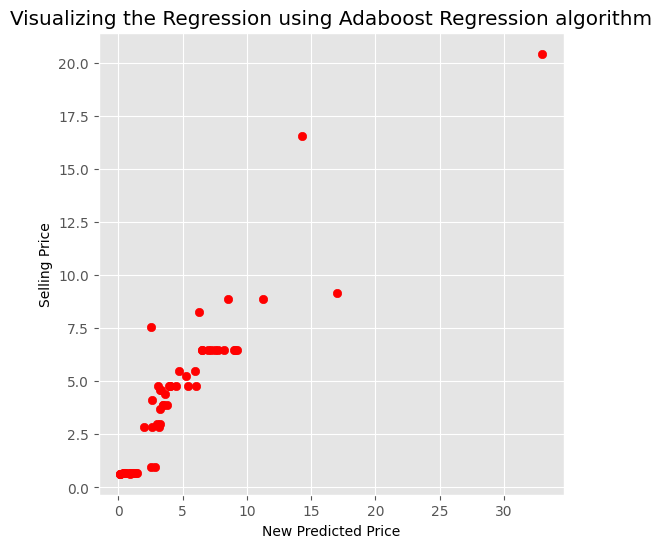

In [27]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=10)
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)
print(Y_pred)

train_accuracy_ada = ada.score(X_train, Y_train)
test_accuracy_ada= ada.score(X_test, Y_test)
r2_score_ada= r2_score(Y_test, Y_pred)
#Adaboost does not have coeff and intedcept
#print("Coeff are :",ada.coef_)
#print("Intercept  :",ada.intercept_)
print("--------------------------------------------")
print('train_accuracy_ada:', train_accuracy_ada)
print("--------------------------------------------")
print('test_accuracy_ada:', test_accuracy_ada)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_ada)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Adaboost Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()


[ 0.20027637  1.9157013   1.1877878   1.0161157   2.5994422   4.5548916
  5.200681    3.0675933   0.59926474  3.1827586   0.3675139   5.692607
  6.3387165   3.4416335   1.523681    7.1409206  14.202197    0.24556792
  7.314005    1.3109845   0.6928751   9.047868    4.6497636   0.42656806
  7.2922273  10.170586    0.4681337   4.531846    0.59926474  0.94772434
  5.8330307  11.183502    4.6497636   6.58085     7.497745    4.0738735
  3.5173059  13.01731     2.838448    5.7559915   7.314005    4.8668766
  4.7619305   4.6497636   2.966495    0.4742971   0.6928751   2.858287
  0.60718113  1.554709   20.90696     1.2281601   4.297505    8.055555
  5.692607    1.4171511   8.55692     1.523681    2.8686883   2.2172372
  0.2194137 ]
--------------------------------------------
train_accuracy_xgb: 0.9841156944349241
--------------------------------------------
test_accuracy_xgb: 0.7717628330426177
--------------------------------------------
 Acuracy of Our Model is : 0.7717628330426177
--------

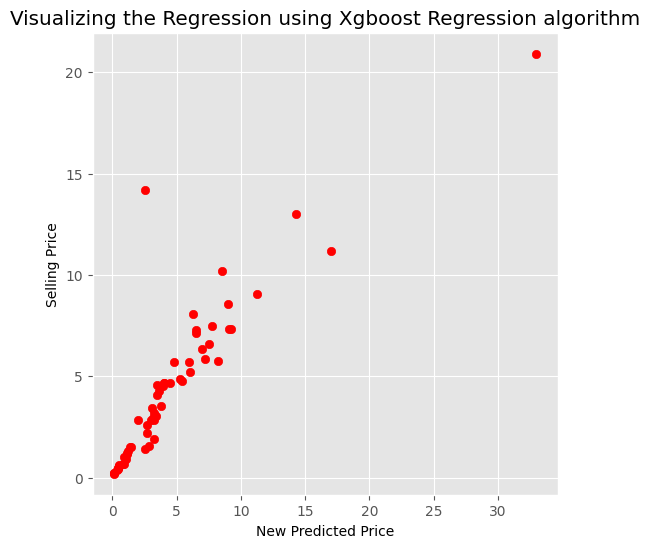

In [28]:
#Xgboost
import xgboost as xg
xgb=xg.XGBRegressor(n_estimators=10)
xgb.fit(X_train,Y_train)
Y_pred=xgb.predict(X_test)
print(Y_pred)

train_accuracy_xgb = xgb.score(X_train, Y_train)
test_accuracy_xgb= xgb.score(X_test, Y_test)
r2_score_xgb= r2_score(Y_test, Y_pred)
#Xgboost regressor does not have coef and intercepts 
#print("Coeff are :",xgb.coef_)
#print("Intercept  :",xgb.intercept_)
print("--------------------------------------------")
print('train_accuracy_xgb:', train_accuracy_xgb)
print("--------------------------------------------")
print('test_accuracy_xgb:', test_accuracy_xgb)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_xgb)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Xgboost Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[ 0.566  2.435  0.877  0.426  3.43   4.2    0.964  3.135  0.839  5.275
  0.675  4.94   7.54   4.9    1.043  5.915  2.18   1.71   6.145  0.922
  0.889  8.395  4.545  0.866  6.11   8.65   2.843  4.87   0.755  0.835
  5.92   8.931  4.985  6.82   8.815  3.955  3.275  9.111  3.145  6.07
  6.145  4.685  6.741  4.985  4.455  0.833  0.916  2.975  0.717  4.84
 20.424  0.767  4.54   7.835  5.165  3.84   7.551  1.019  3.17   2.78
  0.551]
--------------------------------------------
train_accuracy_kn: 0.8865449687494333
--------------------------------------------
test_accuracy_kn: 0.7769016550155174
--------------------------------------------
 Acuracy of Our Model is : 0.7769016550155174
--------------------------------------------


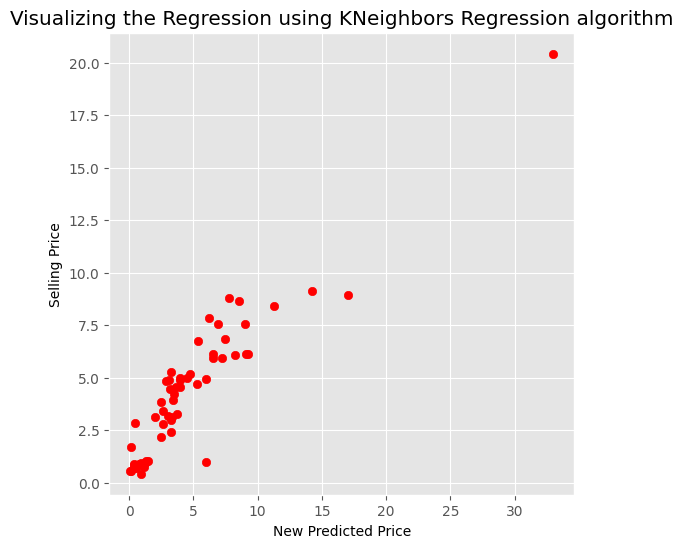

In [29]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=10)
kn.fit(X_train,Y_train)
Y_pred=kn.predict(X_test)
print(Y_pred)

train_accuracy_kn = kn.score(X_train, Y_train)
test_accuracy_kn= kn.score(X_test, Y_test)
r2_score_kn= r2_score(Y_test, Y_pred)
#KNeighbors does not hav an coefficeints and intercepts
#print("Coeff are :",kn.coef_)
#print("Intercept  :",kn.intercept_)
print("--------------------------------------------")
print('train_accuracy_kn:', train_accuracy_kn)
print("--------------------------------------------")
print('test_accuracy_kn:', test_accuracy_kn)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_kn)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using KNeighbors Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()